# Exercise 1 - Solutions

In this exercise, you will solve a physics problem using appropriate *linear algebra* routines from scipy.

**Remember**
   * Solve the problem set using *appropriate* programming techniques
   * You are expected to use numpy and scipy libraries where appropriate.
   * You should run each cell in order from the top of the notebook; don't repeat code from one cell to another
   * Use the "refresh kernel" button to reset everything and start again
   * Make sure your notebook runs fully & without errors, from a fresh kernel, before submitting it

## Problem Overview

A remote overhead camera at a football stadium is suspended by three cables attached to the roof. Each cable is fed from a motorised drum so the camera can be moved around by changing the lengths of the cables. The camera has a mass of 50 kg and the attachment points are all 90 m from the centre of the pitch forming an equilateral triangle in a horizontal plane. The camera is moved in a horizontal plane at constant depth (7m) below the attachment points. You may ignore the mass of the cables.

You should use a 3D coordinate system $(x,y,z)$, in which $(0,0, 0)$ is above the centre of the pitch and the attachment points are at $p_1=(-45\sqrt{3}, -45)$, $p_2=(0, 90)$, $p_3=(45\sqrt{3}, -45)$ metres.

## Part 1

Complete the function below.  The function arguments are the $(x,y)$ position of the camera.  The function should return a 3 element numpy array, containing the tension in the cables attached to $p_1$, $p_2$, $p_3$ respectively. The function arguments and its return values should use SI units.

In [9]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

p_1 = np.array([-45*np.sqrt(3), -45, 0]) #Attachment points
p_2 = np.array([0, 90, 0])
p_3 = np.array([45*np.sqrt(3), -45, 0])
z, m, g = -7, 50, -9.81         #Fixed parameters.


def tension(x, y):
    mag1 = np.sqrt((p_1[0] - x)**2 + (p_1[1] - y)**2 + (p_1[2] - z)**2) #Here i specify the magnitude of the vectors MP_i
    mag2 = np.sqrt((p_2[0] - x)**2 + (p_2[1] - y)**2 + (p_2[2] - z)**2)
    mag3 = np.sqrt((p_3[0] - x)**2 + (p_3[1] - y)**2 + (p_3[2] - z)**2) 

    global V                                                                                
    V = np.array([[(p_1[0] - x)/mag1, (p_2[0] - x)/mag2, (p_3[0] - x)/mag3], 
    [(p_1[1] - y)/mag1, (p_2[1] - y)/mag2, (p_3[1] - y)/mag3], 
    [(p_1[2] - z)/mag1, (p_2[2] - z)/mag2, (p_3[2] - z)/mag3 ]]) #Here V is the unit vector matrix which T is multiplied by to give the resultant forces

    R = np.array([[0], [0], [-m*g]])                             #resultant force matrix
    T = linalg.solve(V,R)                                        #scipy routine for solving for T 
    
    allgreater = all(element >= 0 for element in T)    #all(generator) for checking each element in T is larger than 0. If less than zero, situation is unphysical, and returns an empty array.                                                        
    if allgreater == False:
        return [None, None, None]
    elif allgreater == True: 
        return T

def MatrixMult(x,y):
    elementcheck = all(element == None for element in tension(x,y))
    if elementcheck == True:
        return np.array([[None], [None], [None]])
    elif elementcheck == False:
        return np.matmul(V, tension(x,y))
    
print(MatrixMult(0,0)) 
    


[[  0. ]
 [  0. ]
 [490.5]]


## Part 2

Test your function in the next cell. To do this, call your function for a fixed point and verify the values it returns.


In [10]:
from beautifultable import BeautifulTable
table = BeautifulTable()
table.rows.append([(p_1[0], p_1[1]), tension(p_1[0], p_1[1]), MatrixMult(p_1[0], p_1[1])])
table.rows.append([(p_2[0], p_2[1]), tension(p_2[0], p_2[1]), MatrixMult(p_2[0], p_2[1])])
table.rows.append([(p_3[0], p_3[1]), tension(p_3[0], p_3[1]), MatrixMult(p_3[0], p_3[1])])
table.rows.append([(p_2[0], p_2[1]+1), tension(p_2[0], p_2[1]+1), MatrixMult(p_2[0], p_2[1]+1)])
table.rows.append([(0, 0), tension(0, 0), MatrixMult(0, 0)])
table.rows.append([(1000, 1000), tension(1000, 1000), MatrixMult(1000, 0)])
table.columns.header = ["Coordinates (x,y)", "Tension Values (N)", "Resultant Forces (N)"]
print(table)






+-----------------------------+--------------------+----------------------+
|      Coordinates (x,y)      | Tension Values (N) | Resultant Forces (N) |
+-----------------------------+--------------------+----------------------+
| (-77.94228634059948, -45.0) |      [[490.5]      |       [[  0. ]       |
|                             |       [  0. ]      |        [  0. ]       |
|                             |      [  0. ]]      |       [490.5]]       |
+-----------------------------+--------------------+----------------------+
|           (0, 90)           |      [[ -0. ]      |       [[  0. ]       |
|                             |       [490.5]      |        [  0. ]       |
|                             |      [  0. ]]      |       [490.5]]       |
+-----------------------------+--------------------+----------------------+
| (77.94228634059948, -45.0)  |      [[ -0. ]      |       [[  0. ]       |
|                             |       [  0. ]      |        [  0. ]       |
|           

## Part 3

Now use your function to plot the maximum tension in any given cable as a function of the camera position (x,y).

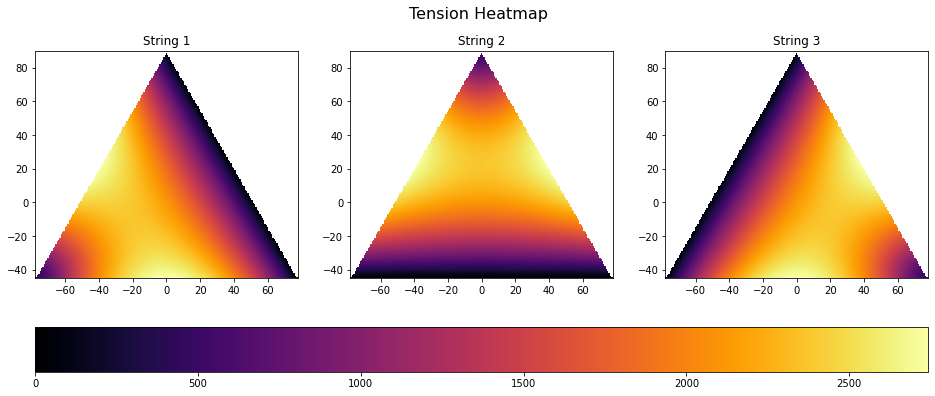

In [16]:


def plotting(min_x, max_x, min_y, max_y, numpoints):
    """
    Simple plotting function, takes the bounds of (x,y) and outputs the tension heat map for each string in the configuration.
    Numpoints denotes the number of elements in the array, which can represent the "resolution" of the heat map. For higher numpoints, the edges of the triangle map, smooth out. 
    For lower numpoints, we see rougher edges.

    """

    xvals = np.linspace(min_x, max_x, numpoints) # arrays for our values of x and y to evaluate the tension at.
    yvals = np.linspace(min_y, max_y, numpoints)

    T1vals= np.zeros((numpoints, numpoints)) 
    T2vals= np.zeros((numpoints, numpoints))
    T3vals= np.zeros((numpoints, numpoints))
    for i in range(numpoints):
        for j in range(numpoints):
            T1vals[i,j] = tension(xvals[j], (yvals[i]))[0]
            T2vals[i,j] = tension(xvals[j], (yvals[i]))[1]
            T3vals[i,j] = tension(xvals[j], (yvals[i]))[2]
    
    fig, axs = plt.subplots(1, 3, figsize=(16,6))
    
    axs[0].set_title('String 1')
    c = axs[0].imshow(T1vals, cmap = 'inferno', extent=[min_x, max_x, max_y, min_y])
    axs[0].invert_yaxis()
    
    axs[1].set_title('String 2')
    axs[1].imshow(T2vals, cmap = 'inferno', extent=[min_x, max_x, max_y, min_y])
    axs[1].invert_yaxis()
    
    axs[2].set_title('String 3')
    axs[2].imshow(T3vals, cmap = 'inferno', extent=[min_x, max_x, max_y, min_y])
    axs[2].invert_yaxis()
    
    fig.colorbar(c, ax=axs, orientation='horizontal')
    fig.suptitle('Tension Heatmap', fontsize= 16, x = 0.51) ##Used imshow, in order to use custom axes to denote the x, y coordinates on the map
    plt.show()  
    

'''
Bounds on x and y
min_x = p_1[0]
min_y = p_1[1]
max_x = p_3[0]
max_y = p_2[1]  
numpoints = 200
'''



plotting(p_1[0], p_3[0], p_1[1], p_2[1], 200)




## Part 4

In the Markdown cell below, describe how your code solves the problem set. State any equations used in the solution and how they were obtained. Include your reasons for any libraries you used, as well as any particular programming techniques. Explain your choice of any test cases. Finally, state any salient features of the results you obtained. You are not expected to write more than about 250-300 words.